In [1]:
import numpy as np
import matplotlib.pyplot as plt

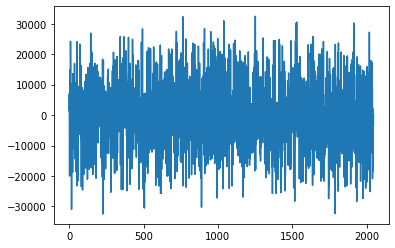

In [2]:
wave = np.fromfile('calibrator_231001.bin' ,dtype=np.int16)
plt.plot(wave)
sampling_rate=102.4e6
Ns = len(wave) # basic waveform length
Nx = 1 # number of repetitions we want to generate
Npt = Ns * Nx # total length


In [3]:
data_undrifted = np.genfromtxt("25mhz_240611_153549.csv", delimiter=',')[:,4]


In [27]:
wave_f = np.fft.rfft(wave)
freqs = np.fft.rfftfreq(Ns)
phi = np.arange(Npt)*2*np.pi/Ns
# bw = np.zeros(Npt, dtype=complex)
# bw_conj = np.zeros(Npt, dtype=complex)
# for freq, comp in enumerate(wave_f):
#     bw[freq] = comp
#     bw_conj[freq] = np.conj(comp)
    

In [97]:
def get_peaks (signal, Nex=1, fbase=50e3, fstep=100e3, fmax=1e6, fdelta=30e3, sampling_rate=102.4e6):
    N = len(signal) 
    dt =  N*Nex/sampling_rate
    df = 1/dt
    window = np.hanning(N)
    signal_l = np.hstack( (signal*window, np.zeros(N*Nex-N)) )
    signal_f = np.fft.rfft(signal_l)
    freqs = []
    a_w = []
    back = []
    while fbase < fmax:
        ndx = int(fbase/df)
        delta_ndx = int(fdelta/df)
        slice = np.abs(signal_f[ndx-delta_ndx:ndx+delta_ndx])
        if len(slice) == 0: 
            break            # we reached the end            
        maxf_i = np.argmax(slice)+ndx-delta_ndx
        #print(ndx-delta_ndx,maxf_i, len(signal_f))
        back.append((maxf_i, signal_f[maxf_i]))
        freqs.append(maxf_i*df)
        a_w.append(signal_f[maxf_i])
        fbase += fstep

    signal_f *= 0
    for a,b in back:
        signal_f[a] = b
    signal_l = np.fft.irfft(signal_f)[0:N]
    return np.array(freqs), np.array(a_w), df, Nex*2*signal_l

In [98]:
freqs, a_w, df, sigb = get_peaks(data_undrifted, 20, fbase=9e6+50e3, fmax=50e6, sampling_rate=sampling_rate)
freqs_og, b_w, df_og, sigb_og = get_peaks(wave, 20, fbase=9e6+50e3, fmax=50e6, sampling_rate=sampling_rate)

In [100]:
bw_conj = np.conj(b_w)
amp_coefs = np.abs(a_w * bw_conj)
print(amp_coefs[:20])

[9.10757874e+10 9.28342207e+10 9.44901144e+10 9.44310494e+10
 9.44334206e+10 9.85862799e+10 1.01113560e+11 9.84414469e+10
 1.02568329e+11 1.01200473e+11 1.03174641e+11 1.04038590e+11
 1.03970069e+11 1.05218670e+11 1.06224377e+11 1.07072082e+11
 1.10465744e+11 1.08932889e+11 1.10629510e+11 1.10742638e+11
 1.12993207e+11 1.15363298e+11 1.13394591e+11 1.14309099e+11
 1.17814740e+11 1.19679888e+11 1.21311152e+11 1.20895111e+11
 1.18640379e+11 1.18750358e+11 1.19121396e+11 1.20699264e+11
 1.26306250e+11 1.26796942e+11 1.28380214e+11 1.23567490e+11
 1.23494112e+11 1.25995431e+11 1.24236353e+11 1.25739228e+11
 1.25647770e+11 1.28291124e+11 1.31892850e+11 1.31366361e+11
 1.28502874e+11 1.35261189e+11 1.29521958e+11 1.33819163e+11
 1.31198011e+11 1.31518003e+11 1.32405604e+11 1.33784432e+11
 1.37000606e+11 1.40200361e+11 1.36083352e+11 1.35457198e+11
 1.41635622e+11 1.39944381e+11 1.37750620e+11 1.39433987e+11
 1.39285834e+11 1.42178809e+11 1.44890616e+11 1.42779744e+11
 1.44169298e+11 1.453114

In [102]:
exp_iwt = (a_w * bw_conj) / (b_w * bw_conj * amp_coefs)
print(exp_iwt[:20])


[ 6.44704810e-12-4.26622801e-12j -5.27702066e-12-5.43435648e-12j
  6.86036006e-12+2.82142758e-12j  2.80518380e-12-7.04470149e-12j
 -7.39443063e-12+2.33161607e-12j  7.38535688e-12-1.19635767e-13j
 -7.05267787e-12-6.12320353e-13j -7.20095533e-12+2.81885612e-12j
 -1.75470036e-12-7.03483521e-12j  4.73419572e-13-7.65680499e-12j
  3.67250743e-12+6.65044195e-12j -4.07739776e-12+6.44285712e-12j
  4.65820582e-12+6.19082905e-12j  6.30733513e-12+4.32819843e-12j
 -5.34637332e-12+5.59927431e-12j  5.27881372e-12+5.67794424e-12j
 -6.42565895e-13+7.44024008e-12j  7.68806099e-12+6.40193124e-14j
  1.24399054e-12+7.57056286e-12j  4.85269413e-12-6.03592497e-12j
 -2.24351045e-12+7.30703934e-12j -1.01298238e-12-7.31136822e-12j
 -3.07448321e-12+7.11862400e-12j  6.78558778e-12-3.75646554e-12j
 -6.59158845e-12+3.52501390e-12j -2.88794935e-12+6.75291302e-12j
  3.55259193e-12-6.22811722e-12j  2.80627282e-12-6.80024213e-12j
 -3.57703424e-12-6.85020612e-12j -2.77167067e-12-7.24600905e-12j
  7.33031516e-12-2.537699

In [109]:
# using euler's
wt_real = np.real(exp_iwt)  # get the real cos component
wt_alone = np.arccos(wt_real)  # get wt
delta_t = wt_alone / freqs_og
print(delta_t[:20])

(7.49592930809169e-21+1.042027684544144e-20j)
